In [1]:
import sys
import numpy as np
from pathlib import Path
import fnmatch
import os
import io
from opticalglass import util
import matplotlib.pyplot as plt

In [2]:
from opticalglass import rindexinfo
from opticalglass.rindexinfo import summary_plots, get_glassname_from_filestr

from opticalglass.glassfactory import create_glass
from opticalglass.glasserror import GlassError

In [3]:
#import requests

# Get a list of all the Yaml files under the database root

In [4]:
db_root = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database'
path_root = Path(db_root)

In [5]:
os.getcwd()

'/Users/Mike/Developer/PyProjects/opticalglass/notebooks'

In [6]:
os.chdir(db_root)

In [7]:
log = []

# Redirect stderr
class writer(io.TextIOBase):
    def write(self, data):
        log.append(data)
        return len(data)

sys.stderr = writer()

In [8]:
files = []
offset = len(db_root)
for root, dirnames, filenames in os.walk(db_root):
#    print(f"{root[offset:]}")
    for filename in fnmatch.filter(filenames, '*.yml'):
#        print(f"    {filename}")
        files.append(os.path.join(root, filename))

In [9]:
len(files)

2827

In [10]:
url = 'https://refractiveindex.info/database/data-nk/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
fname = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/organic/(C16H14O3)n - polycarbonate/Zhang.yml'

In [11]:
full_db_path = url[:-4].partition('database/data-nk/')[2]
name_catalog = full_db_path.split('/')
full_db_path, name_catalog

('organic/(C16H14O3)n%20-%20polycarbonate/Zhang',
 ['organic', '(C16H14O3)n%20-%20polycarbonate', 'Zhang'])

In [12]:
fname.partition('database/data-nk/')[2].split('/')

['organic', '(C16H14O3)n - polycarbonate', 'Zhang.yml']

In [13]:
get_glassname_from_filestr(fname)

('data-nk', '(C16H14O3)n - polycarbonate [Zhang.yml]', 'rii-organic')

# Test reading via URL

## Polycarbonate

['tabulated nk']


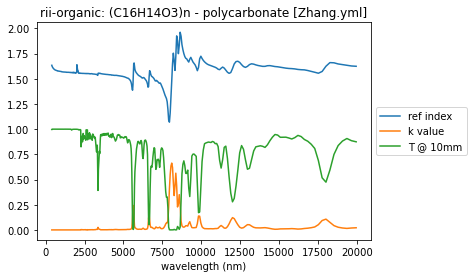

In [14]:
polycarb_url = 'https://refractiveindex.info/database/data-nk/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
polycarb = create_glass(polycarb_url, "rindexinfo")
summary_plots(polycarb, polycarb.yaml_data)

In [15]:
polycarb_url[46:].split('/')

['organic', '(C16H14O3)n%20-%20polycarbonate', 'Zhang.yml']

## Ohara FPL53

['formula 3', 'tabulated k']


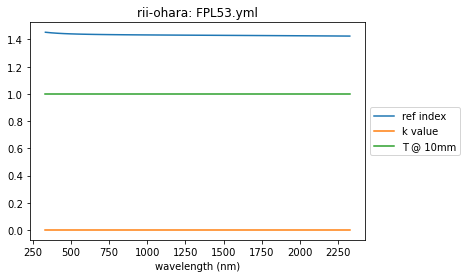

In [16]:
FPL53_url = 'https://refractiveindex.info/database/data-nk/glass/ohara/FPL53.yml'
FPL53 = create_glass(FPL53_url, "rindexinfo")
summary_plots(FPL53, FPL53.yaml_data)

## CaF2

['formula 2']


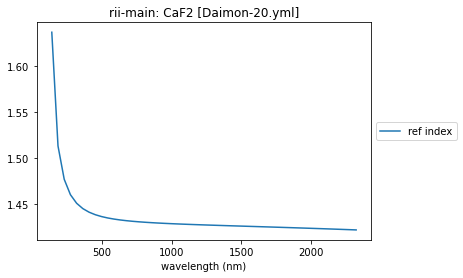

In [17]:
caf2_url = 'https://refractiveindex.info/database/data-nk/main/CaF2/Daimon-20.yml'
caf2 = create_glass(caf2_url, "rindexinfo")
summary_plots(caf2, caf2.yaml_data)

## SiO2

['formula 1']


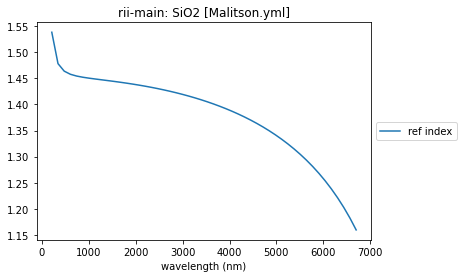

In [18]:
sio2_url = 'https://refractiveindex.info/database/data-nk/main/SiO2/Malitson.yml'
sio2 = create_glass(sio2_url, "rindexinfo")
summary_plots(sio2)

In [19]:
display(sio2.yaml_data['REFERENCES'])

'1) I. H. Malitson. Interspecimen comparison of the refractive index of fused silica, <a href="https://doi.org/10.1364/JOSA.55.001205"><i>J. Opt. Soc. Am.</i> <b>55</b>, 1205-1208 (1965)</a><br>2) C. Z. Tan. Determination of refractive index of silica glass for infrared wavelengths by IR spectroscopy, <a href="https://doi.org/10.1016/S0022-3093(97)00438-9"><i>J. Non-Cryst. Solids</i> <b>223</b>, 158-163 (1998)</a><br> <sup>*</sup> Sellmeier formula is reported in Ref. 1 for the 0.21-3.71 μm wavelength range. Ref. 2 verifies the validity of the formula up to 6.7 μm.'

## Germanium

['tabulated nk']


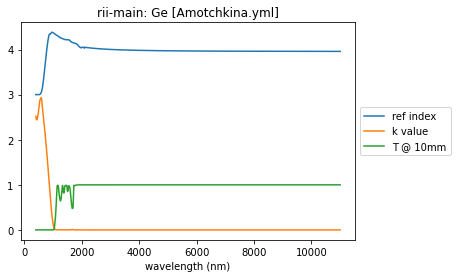

In [20]:
ge_url = 'https://refractiveindex.info/database/data-nk/main/Ge/Amotchkina.yml'
ge = create_glass(ge_url, "rindexinfo")
summary_plots(ge, ge.yaml_data)

# Test "DB not supported" exception handling

## ZnS from data-n2

In [21]:
zns_url = 'https://refractiveindex.info/database/data-n2/main/ZnS/Adair-o.yml'
try:
    zns = create_glass(zns_url, "rindexinfo")
except GlassError as gerr:
    print(f"Glass DB not supported: {gerr}")
else:    
    summary_plots(zns)

Glass DB not supported: data-n2


# Test reading .yml files

## PEDOT

In [22]:
pedot_filename = files[239]
pedot_filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/other/mixed organic/PEDOT-PSS/Chen.yml'

['tabulated n', 'tabulated k']


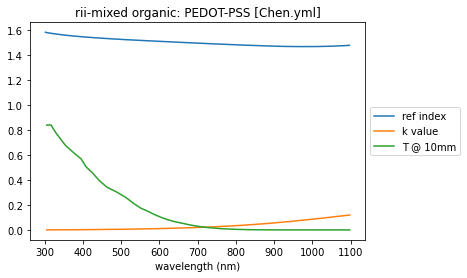

In [23]:
pedot = create_glass(pedot_filename, "rindexinfo")
summary_plots(pedot)

## CCl4 - carbon tetrachloride

In [24]:
filename = files[108]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/organic/CCl4 - carbon tetrachloride/Moutzouris.yml'

['formula 3']


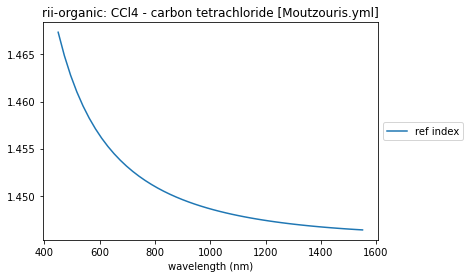

In [25]:
CCl4 = create_glass(Path(filename), "rindexinfo")
summary_plots(CCl4, CCl4.yaml_data)

## F1 LZOS

In [26]:
filename = files[375]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/glass/lzos/F1.yml'

['tabulated n']


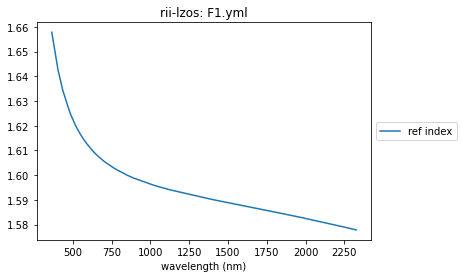

In [27]:
F1 = create_glass(filename, "rindexinfo")
summary_plots(F1)

In [28]:
vars(F1)

{'label': 'F1.yml',
 '_catalog': 'rii-lzos',
 'wvls': array([ 365.  ,  404.66,  435.83,  479.99,  486.13,  488.  ,  514.  ,
         520.8 ,  530.  ,  546.07,  568.2 ,  587.56,  589.29,  632.8 ,
         643.85,  647.1 ,  656.27,  694.3 ,  706.52,  768.2 ,  852.1 ,
         890.  , 1013.9 , 1060.  , 1128.6 , 1395.1 , 1529.6 , 1813.1 ,
        1970.1 , 2249.3 , 2325.4 ]),
 'rndx': array([1.65782 , 1.64269 , 1.634312, 1.625647, 1.624657, 1.62436 ,
        1.62066 , 1.61979 , 1.61868 , 1.616878, 1.61467 , 1.612945,
        1.6128  , 1.60955 , 1.608833, 1.60863 , 1.608067, 1.60597 ,
        1.60537 , 1.60273 , 1.59994 , 1.59889 , 1.59609 , 1.59522 ,
        1.59404 , 1.59021 , 1.5885  , 1.58493 , 1.58289 , 1.57899 ,
        1.57785 ]),
 'kvals': None,
 'kvals_wvls': None,
 'rindex_interp': <scipy.interpolate._interpolate.interp1d at 0x7fd432434630>,
 'kvals_interp': None,
 'yaml_data': {'REFERENCES': '<a href="http://lzos.ru/en/index.php?option=com_content&task=view&id=54">LZOS Clear optic

## MgF2

In [29]:
filename = files[2234]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/main/MgF2/Li-e.yml'

['formula 1']


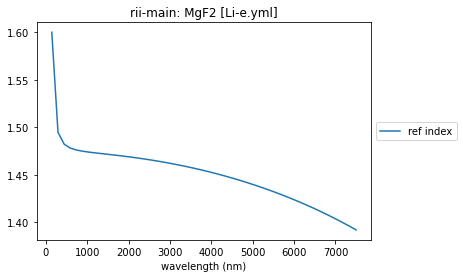

In [30]:
MgF2 = create_glass(filename, "rindexinfo")
summary_plots(MgF2)

## KNbO3

In [31]:
filename = files[2173]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/main/KNbO3/Umemura-alpha.yml'

['formula 4']


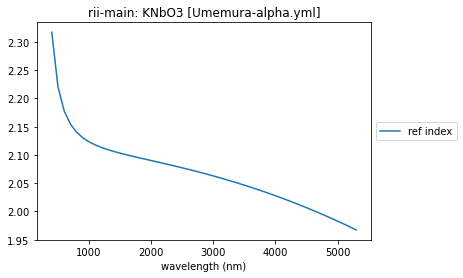

In [32]:
KNbO3 = create_glass(filename, "rindexinfo")
summary_plots(KNbO3)

In [33]:
KNbO3.data_range

array([0.4, 5.3])

In [34]:
KNbO3.yaml_data

{'REFERENCES': 'N. Umemura, K. Yoshida, and K. Kato. Phase-matching properties of KNbO<sub>3</sub> in the mid-infrared, <a href="    https://doi.org/10.1364/AO.38.000991"><i>Appl Opt.</i> <b>38</b>, 991-994 (1999)</a>',
 'COMMENTS': 'n<sub>α</sub>; 22 °C.',
 'DATA': [{'type': 'formula 4',
   'wavelength_range': '0.40 5.3',
   'coefficients': '4.4222 0.09972 0 0.05496 1 0 0 0 1 -0.01976 2'}]}

In [35]:
KNbO3.coefs

array([ 4.4222 ,  0.09972,  0.     ,  0.05496,  1.     ,  0.     ,
        0.     ,  0.     ,  1.     , -0.01976,  2.     ])

In [36]:
len(KNbO3.coefs)

11

## Liquid crystal MLC-6608

In [37]:
filename = files[260]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/other/liquid crystals/MLC-6608/Li-o.yml'

['formula 5']


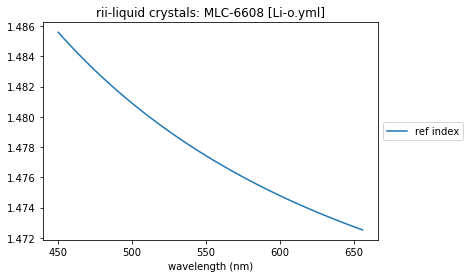

In [38]:
LC = create_glass(Path(filename), "rindexinfo")
summary_plots(LC, LC.yaml_data)

In [39]:
LC.data_range

array([0.45 , 0.656])

In [40]:
2373

2373

## CdS

In [41]:
filename = files[2373]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/main/CdS/Bieniewski-o.yml'

['formula 4']


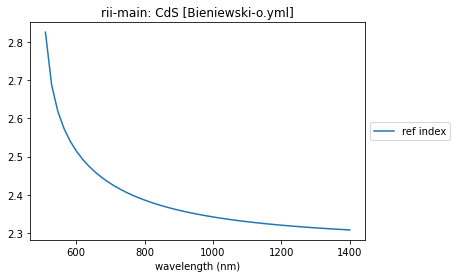

In [42]:
CdS = create_glass(Path(filename), "rindexinfo")
summary_plots(CdS, CdS.yaml_data)

In [43]:
CdS.data_range

array([0.51, 1.4 ])

In [44]:
CdS.coefs

array([5.1792  , 0.23504 , 0.      , 0.083591, 1.      , 0.036927,
       0.      , 0.23504 , 1.      ])

In [45]:
CdS.yaml_data['REFERENCES']

'1) T. M. Bieniewski and S. J. Czyzak. Refractive indexes of single hexagonal ZnS and CdS crystals, <a href="https://doi.org/10.1364/JOSA.53.000496"><i>J. Opt. Soc. Am.</i> <b>53</b>, 496-497 (1963)</a><br>2) M. Sanchez Gomez, J. M. Guerra, and F. Vilches. Weighted nonlinear regression analysis of a Sellmeier expansion: comparison of several nonlinear fits of CdS dispersion, <a href="https://doi.org/10.1364/AO.24.001147"><i>Appl. Opt.</i> <b>24</b>, 1147-1150 (1985)</a></br>* Ref. 2 provides a dispersion formula based on data from ref. 1'

## PtAl2

In [46]:
filename = files[179]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/other/intermetallics/PtAl2/Chen.yml'

['tabulated nk']


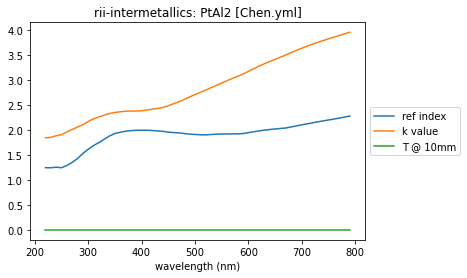

In [47]:
PtAl2 = create_glass(filename, "rindexinfo")
summary_plots(PtAl2, PtAl2.yaml_data)

## C2ClF3

In [48]:
filename = files[43]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/organic/(C2ClF3)n - polychlorotrifluoroethylene/Smith.yml'

['tabulated nk']


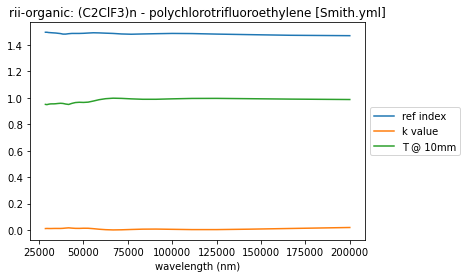

In [49]:
try:
    C2ClF3 = create_glass(filename, "rindexinfo")
except Exception as err:
    print(err)
else:
    summary_plots(C2ClF3, C2ClF3.yaml_data)

In [50]:
C2ClF3.yaml_data

{'REFERENCES': 'D. R. Smith and E. V. Loewenstein. Optical constants of far infrared materials. 3: plastics, <a href="https://doi.org/10.1364/AO.14.001335"><i>Appl. Opt.</i> <b>14</b>, 1335-1341 (1975)</a>',
 'COMMENTS': 'Manufactured by Allied Chemical under the name Aclar.',
 'DATA': [{'type': 'tabulated nk',
   'data': '28.5714 1.497 0.0114\n29.4118 1.497 0.0122\n30.3030 1.495 0.0118\n31.2500 1.494 0.0116\n32.2581 1.493 0.0118\n33.3333 1.492 0.0122\n34.4828 1.491 0.0123\n35.7143 1.489 0.0122\n37.0370 1.487 0.0122\n38.4615 1.483 0.0131\n40.0000 1.483 0.0151\n41.6667 1.486 0.0168\n43.4783 1.488 0.0146\n45.4545 1.488 0.0129\n47.6190 1.488 0.0127\n50.0000 1.489 0.0138\n52.6316 1.491 0.0136\n55.5556 1.493 0.0106\n58.8235 1.492 0.00632\n62.5000 1.490 0.0029\n66.6667 1.488 0.0011\n71.4286 1.484 0.0020\n76.9231 1.482 0.0044\n83.3333 1.484 0.00683\n90.9091 1.486 0.00745\n100.0000 1.488 0.0056\n111.1111 1.487 0.0035\n125.0000 1.483 0.0035\n142.8571 1.479 0.0066\n166.6667 1.474 0.012\n200.0000